# KL Divergence

In [8]:
from sklearn import manifold, datasets
from scipy.stats import entropy, pearsonr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

In [18]:

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
x, col = datasets.make_swiss_roll(n_points, noise=0.05)

X1, X2, X3 = X.T

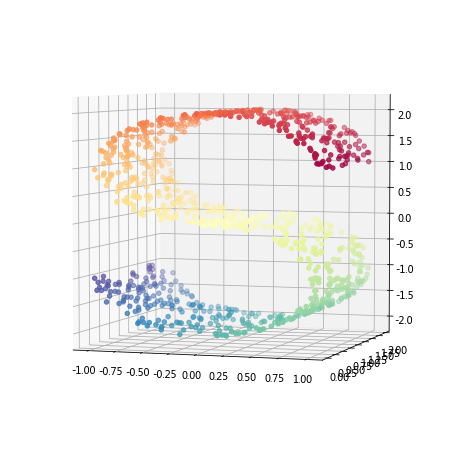

In [16]:
# Create figure
fig = plt.figure(figsize=(8, 8))

# Add 3d scatter plot
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

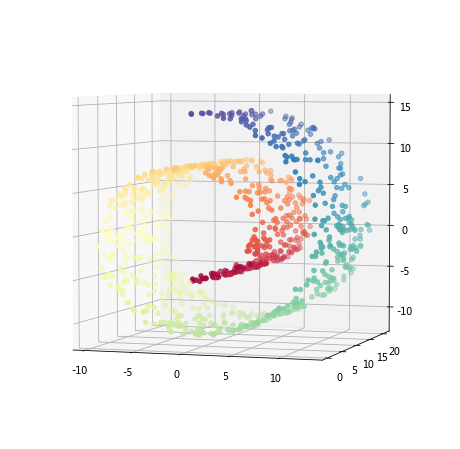

In [19]:
# Create figure
fig = plt.figure(figsize=(8, 8))

# Add 3d scatter plot
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=col, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

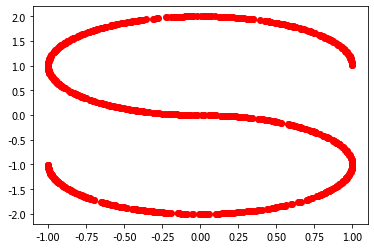

In [24]:
plt.plot(X1, X3, 'ro');

In [60]:
normalized_mutual_info_score(X1, X3), pearsonr(X1, X3)

(1.0, (-0.08697318258913389, 0.005921261651160034))

In [38]:
def processNegVals(x):
    x = np.array(x)
    minx = np.min(x)
    if minx < 0:
        x = x + abs(minx)
    """ 0.000001 is used here to avoid 0. """
    x = x + 0.000001
    px = x/np.sum(x)
    return px

In [95]:
entropy(processNegVals(X1), processNegVals(X3))

0.9820849486320271

In [39]:
def KL(P,Q):
    epsilon = 0.00001
    P = processNegVals(P)
    Q = processNegVals(Q)
    # You may want to instead make copies to avoid changing the np arrays.
    divergence = np.sum(P*np.log(P/Q))
    return divergence

In [94]:
KL(X1, X3)

0.9820849486320271

In [109]:
# Kullback-Leibler divergence is basically the sum of the relative entropy of two probabilities:

import scipy
vec = scipy.special.rel_entr(processNegVals(X1), processNegVals(X3))    
kl_div = np.sum(vec)
kl_div

0.9820849486320271

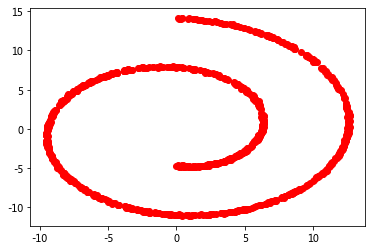

In [80]:
plt.plot(x[:,0], x[:,2], 'ro');

In [82]:
KL(x[:,0], x[:,2])

0.6193061278370542

In [83]:
entropy(processNegVals(x[:,0]), processNegVals(x[:,2]))

0.6193061278370544

In [108]:
# Kullback-Leibler divergence is basically the sum of the relative entropy of two probabilities:

import scipy
vec = scipy.special.rel_entr(processNegVals(x[:,0]), processNegVals(x[:,2]))    
kl_div = np.sum(vec)
kl_div

0.6193061278370542

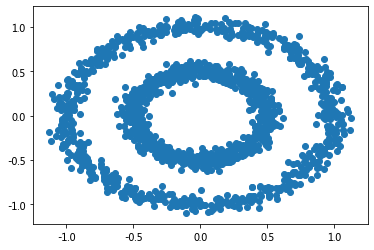

In [75]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, 
                                      factor=.5,
                                      noise=.05)

c1, c2 = noisy_circles[0][:,0], noisy_circles[0][:,1]

plt.scatter(c1, c2);

In [73]:
KL(c1, c2), entropy(processNegVals(c1), processNegVals(c2)), pearsonr(c1, c2)

(0.3705245581961967,
 0.3705245581961967,
 (0.0009233483083248371, 0.9714965955817252))

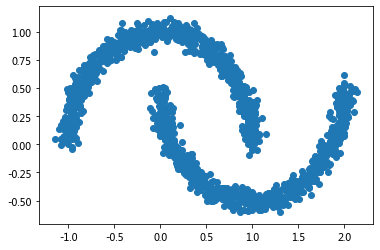

In [76]:
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
m1, m2 = noisy_moons[0][:,0], noisy_moons[0][:,1]
plt.scatter(m1, m2);


In [77]:
KL(m1, m2), entropy(processNegVals(m1), processNegVals(m2)), pearsonr(m1, m2)

(0.64323091348723,
 0.64323091348723,
 (-0.44759555499930603, 8.659194606811307e-75))

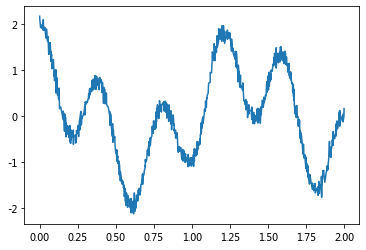

In [78]:
# Creating our own non-linear dataset
# A good way to create a non-linear dataset is to mix sines with different phases.
n_samples = 1000
de_linearize = lambda X: np.cos(1.5 * np.pi * X) + np.cos( 5 * np.pi * X )
X = np.sort(np.random.rand(n_samples)) * 2
y = de_linearize(X) + np.random.randn(n_samples) * 0.1

plt.plot(X, y);


In [79]:
KL(X, y), entropy(processNegVals(X), processNegVals(y)), pearsonr(X, y)

(0.35368486325681037,
 0.35368486325681014,
 (-0.030606904040838705, 0.3335983907604126))

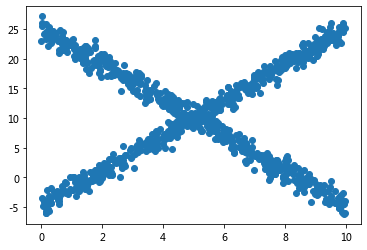

In [80]:
# generate training set
rng = np.random.RandomState(1)
x = 10 * rng.rand(1000)
x1 = np.random.choice(x, size = 500, replace = False)
x2 = np.array([i for i in x if i not in x1])
y1 = 3 * x1 - 5 + rng.randn(500)
y2 = -3 * x2 + 25 + rng.randn(500)
x = np.hstack((x1, x2))
y = np.hstack((y1, y2))
plt.scatter(x, y);

In [81]:
KL(x, y), entropy(processNegVals(x), processNegVals(y)), pearsonr(x, y)

(0.4341830070262035,
 0.4341830070262035,
 (0.018987388444658082, 0.5486815033156951))

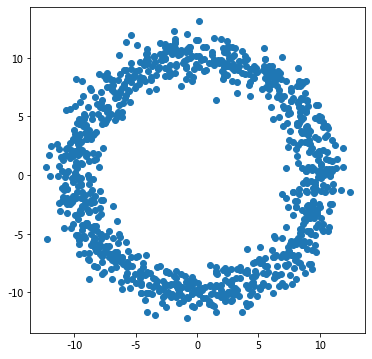

In [90]:
num_samples = 1000

# make a simple unit circle 
theta = np.linspace(0, 2*np.pi, num_samples)
a, b = 1 * np.cos(theta), 1 * np.sin(theta)

# generate the points
# theta = np.random.rand((num_samples)) * (2 * np.pi)
r = 10
x, y = r * np.cos(theta)+ rng.randn(num_samples), r * np.sin(theta)+ rng.randn(num_samples)

# plots
plt.figure(figsize=(6,6))
plt.plot(x, y, marker='o', linestyle='');

In [91]:
KL(x, y), entropy(processNegVals(x), processNegVals(y)), pearsonr(x, y)

(0.45900891300219837,
 0.45900891300219837,
 (0.001991373458561054, 0.949850865621781))

## Detecting Novel Associations in Large Data Sets

David N. Reshef, Yakir A. Reshef, Hilary K. Finucane, Sharon R. Grossman, Gilean McVean, Peter J. Turnbaugh, Eric S. Lander, Michael Mitzenmacher, Pardis C. Sabeti, (2011) **Detecting Novel Associations in Large Data Sets**. Science.334 (6062):1518-1524.DOI: 10.1126/science.1205438

Abstract

Identifying interesting relationships between pairs of variables in large data sets is increasingly important. Here, we present a measure of dependence for two-variable relationships: the maximal information coefficient (MIC). 
- MIC captures a wide range of associations both functional and not, and for functional relationships provides a score that roughly equals the coefficient of determination (R2) of the data relative to the regression function. 
- MIC belongs to a larger class of maximal information-based nonparametric exploration (MINE) statistics for identifying and classifying relationships. 

We apply MIC and MINE to data sets in global health, gene expression, major-league baseball, and the human gut microbiota and identify known and novel relationships.

https://science.sciencemag.org/content/334/6062/1518

https://minepy.readthedocs.io/en/latest/python.html

In [3]:
!pip install minepy


     |████████████████████████████████| 495 kB 550 kB/s eta 0:00:01
  Created wheel for minepy: filename=minepy-1.2.5-cp37-cp37m-macosx_10_9_x86_64.whl size=53204 sha256=bc8898a79054426890486cd6b5726a0e3347dcd73b2616fe865bda505a322376
  Stored in directory: /Users/datalab/Library/Caches/pip/wheels/d1/ea/d7/fabbfa6e294adcbc43dabca0e0158dafdd36051246992c7311
Successfully built minepy


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


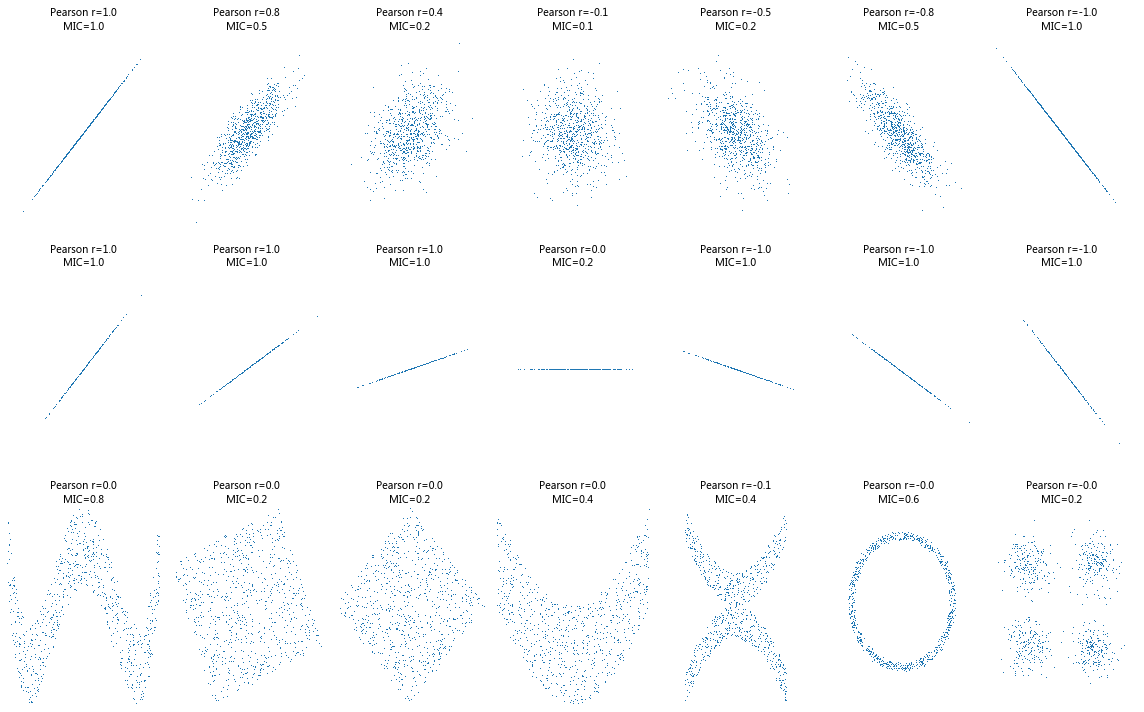

In [6]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from minepy import MINE


rs = np.random.RandomState(seed=0)

def mysubplot(x, y, numRows, numCols, plotNum,
              xlim=(-4, 4), ylim=(-4, 4)):

    r = np.around(np.corrcoef(x, y)[0, 1], 1)
    mine = MINE(alpha=0.6, c=15, est="mic_approx")
    mine.compute_score(x, y)
    mic = np.around(mine.mic(), 1)
    ax = plt.subplot(numRows, numCols, plotNum,
                     xlim=xlim, ylim=ylim)
    ax.set_title('Pearson r=%.1f\nMIC=%.1f' % (r, mic),fontsize=10)
    ax.set_frame_on(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.plot(x, y, ',')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

def rotation(xy, t):
    return np.dot(xy, [[np.cos(t), -np.sin(t)], [np.sin(t), np.cos(t)]])

def mvnormal(n=1000):
    cors = [1.0, 0.8, 0.4, 0.0, -0.4, -0.8, -1.0]
    for i, cor in enumerate(cors):
        cov = [[1, cor],[cor, 1]]
        xy = rs.multivariate_normal([0, 0], cov, n)
        mysubplot(xy[:, 0], xy[:, 1], 3, 7, i+1)

def rotnormal(n=1000):
    ts = [0, np.pi/12, np.pi/6, np.pi/4, np.pi/2-np.pi/6,
          np.pi/2-np.pi/12, np.pi/2]
    cov = [[1, 1],[1, 1]]
    xy = rs.multivariate_normal([0, 0], cov, n)
    for i, t in enumerate(ts):
        xy_r = rotation(xy, t)
        mysubplot(xy_r[:, 0], xy_r[:, 1], 3, 7, i+8)

def others(n=1000):
    x = rs.uniform(-1, 1, n)
    y = 4*(x**2-0.5)**2 + rs.uniform(-1, 1, n)/3
    mysubplot(x, y, 3, 7, 15, (-1, 1), (-1/3, 1+1/3))

    y = rs.uniform(-1, 1, n)
    xy = np.concatenate((x.reshape(-1, 1), y.reshape(-1, 1)), axis=1)
    xy = rotation(xy, -np.pi/8)
    lim = np.sqrt(2+np.sqrt(2)) / np.sqrt(2)
    mysubplot(xy[:, 0], xy[:, 1], 3, 7, 16, (-lim, lim), (-lim, lim))

    xy = rotation(xy, -np.pi/8)
    lim = np.sqrt(2)
    mysubplot(xy[:, 0], xy[:, 1], 3, 7, 17, (-lim, lim), (-lim, lim))

    y = 2*x**2 + rs.uniform(-1, 1, n)
    mysubplot(x, y, 3, 7, 18, (-1, 1), (-1, 3))

    y = (x**2 + rs.uniform(0, 0.5, n)) * \
        np.array([-1, 1])[rs.random_integers(0, 1, size=n)]
    mysubplot(x, y, 3, 7, 19, (-1.5, 1.5), (-1.5, 1.5))

    y = np.cos(x * np.pi) + rs.uniform(0, 1/8, n)
    x = np.sin(x * np.pi) + rs.uniform(0, 1/8, n)
    mysubplot(x, y, 3, 7, 20, (-1.5, 1.5), (-1.5, 1.5))

    xy1 = np.random.multivariate_normal([3, 3], [[1, 0], [0, 1]], int(n/4))
    xy2 = np.random.multivariate_normal([-3, 3], [[1, 0], [0, 1]], int(n/4))
    xy3 = np.random.multivariate_normal([-3, -3], [[1, 0], [0, 1]], int(n/4))
    xy4 = np.random.multivariate_normal([3, -3], [[1, 0], [0, 1]], int(n/4))
    xy = np.concatenate((xy1, xy2, xy3, xy4), axis=0)
    mysubplot(xy[:, 0], xy[:, 1], 3, 7, 21, (-7, 7), (-7, 7))

plt.figure(facecolor='white', figsize = (16, 10))
mvnormal(n=800)
rotnormal(n=200)
others(n=800)
plt.tight_layout()
plt.show()

LLE: 0.11 sec
LTSA: 0.18 sec
Hessian LLE: 0.28 sec
Modified LLE: 0.23 sec
Isomap: 0.37 sec
MDS: 1.5 sec
SE: 0.079 sec
t-SNE: 3.2 sec


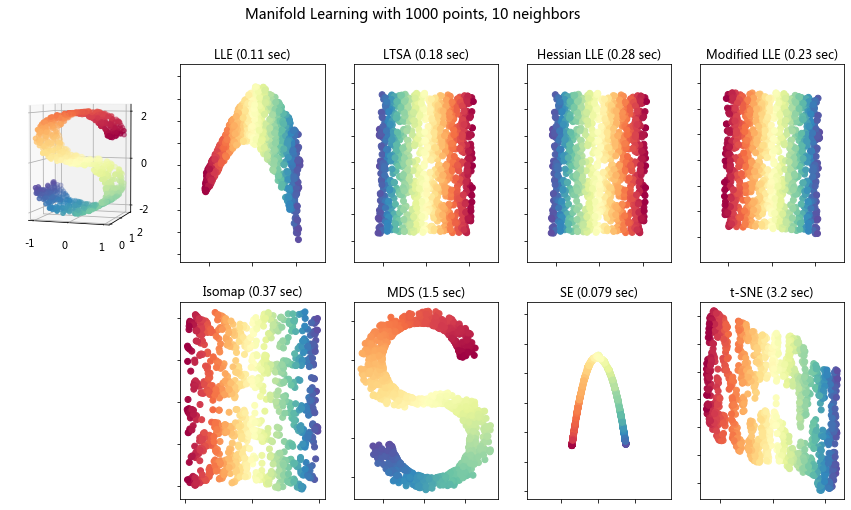

In [43]:
# Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>
from collections import OrderedDict
from functools import partial
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

# Create figure
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

# Add 3d scatter plot
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

# Set-up manifold methods
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='auto')

methods = OrderedDict()
methods['LLE'] = LLE(method='standard')
methods['LTSA'] = LLE(method='ltsa')
methods['Hessian LLE'] = LLE(method='hessian')
methods['Modified LLE'] = LLE(method='modified')
methods['Isomap'] = manifold.Isomap(n_neighbors, n_components)
methods['MDS'] = manifold.MDS(n_components, max_iter=100, n_init=1)
methods['SE'] = manifold.SpectralEmbedding(n_components=n_components,
                                           n_neighbors=n_neighbors)
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
                                 random_state=0)

# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

plt.show()